In [1]:
# Importing basic libraries..
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

# calculate accuracy measures and confusion matrix
from sklearn import metrics

# To calculate the accuracy score of the model..
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report

#Standard Scaler
from sklearn.preprocessing import StandardScaler

Problem statement (Term Deposit Sale) 
Goal 
Using the collected from existing customers, build a model that will help the marketing team identify potential customers who are relatively more likely to subscribe term deposit and thus increase their hit ratio. 

In [2]:
# Loading data from datafile..
bank_df = pd.read_csv("bank-full.csv")

In [3]:
bank_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
bank_df.shape

(45211, 17)

In [5]:
bank_df.info() # many columns are of type object i.e. strings. These need to be converted to ordinal type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
bank_df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'Target'],
      dtype='object')

In [7]:
bank_df.groupby(["Target"]).count()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
Target,,,,,,,,,,,,,,,,
no,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922
yes,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289


<AxesSubplot:xlabel='Target', ylabel='count'>

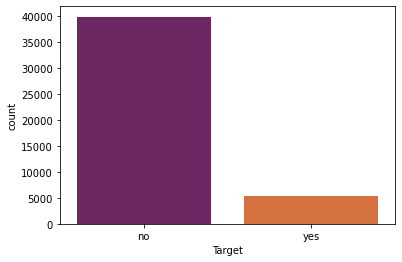

In [12]:
sns.countplot(x='Target',data=bank_df,palette='inferno')

In [13]:
bank_df.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
count,45211.000000,45211,45211,45211,45211,45211.000000,45211,45211,45211,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,45211,45211
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,9732,27214,23202,44396,NaN,25130,37967,29285,NaN,13766,NaN,NaN,NaN,NaN,36959,39922
mean,40.936210,NaN,NaN,NaN,NaN,1362.272058,NaN,NaN,NaN,15.806419,NaN,258.163080,2.763841,40.197828,0.580323,NaN,NaN
std,10.618762,NaN,NaN,NaN,NaN,3044.765829,NaN,NaN,NaN,8.322476,NaN,257.527812,3.098021,100.128746,2.303441,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN


In [14]:
# Handling missing data
# Test whether there is any null value in our dataset or not.
bank_df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

In [15]:
# Decision tree in Python can take only numerical / categorical colums. It cannot take string / obeject types. 
# The following code loops through each column and checks if the column type is object then converts those columns
# into categorical with each distinct value becoming a category or code.

for feature in bank_df.columns: # Loop through all columns in the dataframe
    if bank_df[feature].dtype == 'object': # Only apply for columns with categorical strings
        bank_df[feature] = pd.Categorical(bank_df[feature]).codes # Replace strings with an integer

In [16]:
bank_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


In [17]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        45211 non-null  int64
 1   job        45211 non-null  int8 
 2   marital    45211 non-null  int8 
 3   education  45211 non-null  int8 
 4   default    45211 non-null  int8 
 5   balance    45211 non-null  int64
 6   housing    45211 non-null  int8 
 7   loan       45211 non-null  int8 
 8   contact    45211 non-null  int8 
 9   day        45211 non-null  int64
 10  month      45211 non-null  int8 
 11  duration   45211 non-null  int64
 12  campaign   45211 non-null  int64
 13  pdays      45211 non-null  int64
 14  previous   45211 non-null  int64
 15  poutcome   45211 non-null  int8 
 16  Target     45211 non-null  int8 
dtypes: int64(7), int8(10)
memory usage: 2.8 MB


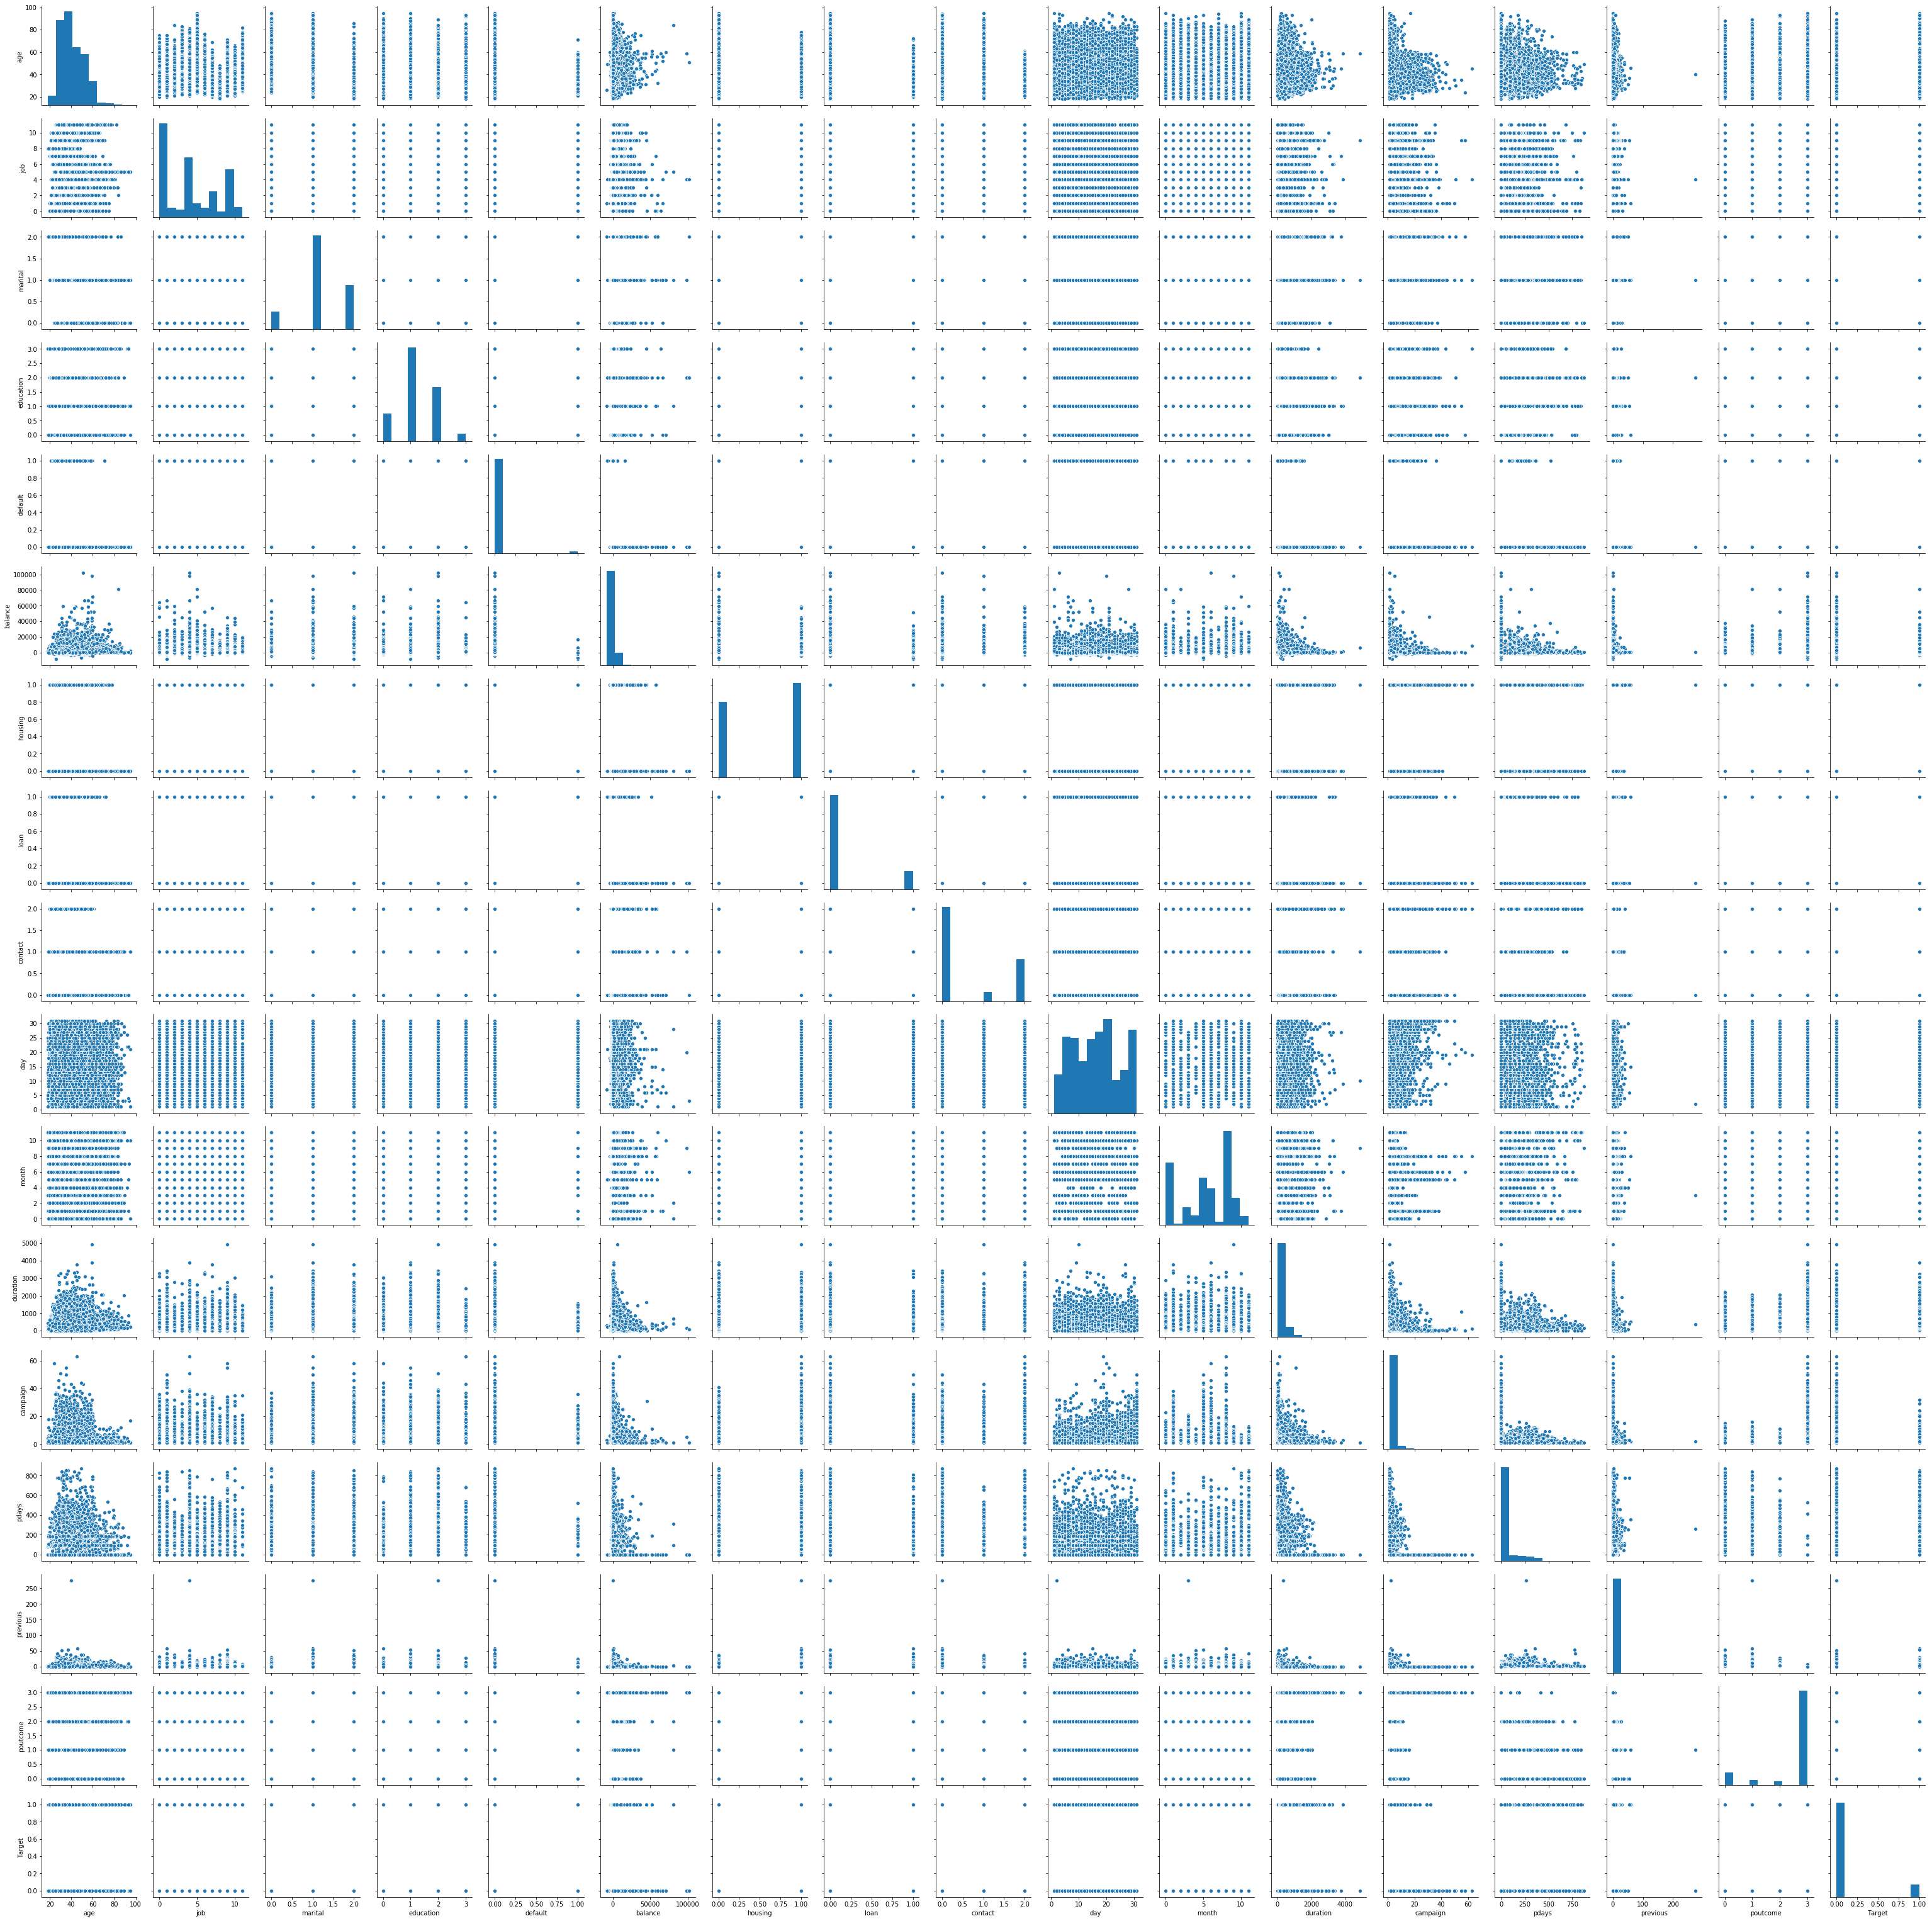

In [14]:
# Pairplot using sns
sns.pairplot(data=bank_df)

In [18]:
X = bank_df.drop("Target", axis=1)
y = bank_df["Target"]   # select all rows and the 17 th column which is the classification "Yes", "No"
test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [19]:
# Instantiating decision tree as the default model

dt_model = DecisionTreeClassifier(criterion = 'entropy' )
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [20]:
# Is the model an overfit model? 
y_pred_dt = dt_model.predict(X_test)
print(dt_model.score(X_train, y_train))
print(dt_model.score(X_test , y_test))

1.0
0.8783544677086406


In [21]:
# Evaluating the DT model:
print("Decision Tree Accuracy  Score:",dt_model.score(X_test , y_test))
print("Decision Tree Precision Score:",metrics.precision_score(y_test,y_pred_dt))
print("Decision Tree Recall    Score:",metrics.recall_score(y_test,y_pred_dt))
print("Confusion Matrix:")
print(metrics.confusion_matrix(y_test, y_pred_dt))

Decision Tree Accuracy  Score: 0.8783544677086406
Decision Tree Precision Score: 0.46228868660598177
Decision Tree Recall    Score: 0.4634941329856584
Confusion Matrix:
[[11203   827]
 [  823   711]]


In [22]:
# Regularising the Decision tree..

reg_dt_model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 7)
reg_dt_model.fit(X_train, y_train)

y_predict = reg_dt_model.predict(X_test)
print(reg_dt_model.score(X_test , y_test))
print(metrics.confusion_matrix(y_test, y_predict))

0.9030521969920378
[[11657   373]
 [  942   592]]


In [23]:
print("Regularized Decision Tree Accuracy  Score:",reg_dt_model.score(X_test , y_test))
print("Regularized Decision Tree Precision Score:",metrics.precision_score(y_test,y_predict))
print("Regularized Decision Tree Recall    Score:",metrics.recall_score(y_test,y_predict))
print("Confusion Matrix:")
print(metrics.confusion_matrix(y_test, y_predict))

Regularized Decision Tree Accuracy  Score: 0.9030521969920378
Regularized Decision Tree Precision Score: 0.6134715025906736
Regularized Decision Tree Recall    Score: 0.3859191655801825
Confusion Matrix:
[[11657   373]
 [  942   592]]


In [24]:
model_scores = [[]]
model_scores = [["Regulaized DT",reg_dt_model.score(X_test,y_test),metrics.precision_score(y_test,y_predict),metrics.recall_score(y_test,y_predict)]]
print(model_scores)

[['Regulaized DT', 0.9030521969920378, 0.6134715025906736, 0.3859191655801825]]


In [25]:
# Ensemble method - Bagging..

bgcl = BaggingClassifier(base_estimator=dt_model, n_estimators=50)
bgcl = bgcl.fit(X_train, y_train)

y_predict = bgcl.predict(X_test)

print("Bagging Accuracy   Score:",bgcl.score(X_test , y_test))
print("Bagging Precision Score:",metrics.precision_score(y_test,y_predict))
print("Bagging Recall    Score:",metrics.recall_score(y_test,y_predict))
print("Confusion Matrix:")
print(metrics.confusion_matrix(y_test, y_predict))

Bagging Accuracy   Score: 0.9057800058979653
Bagging Precision Score: 0.6124780316344464
Bagging Recall    Score: 0.45436766623207303
Confusion Matrix:
[[11589   441]
 [  837   697]]


In [26]:
model_scores.append(["Bagging",bgcl.score(X_test,y_test),metrics.precision_score(y_test,y_predict),metrics.recall_score(y_test,y_predict)])

In [27]:
# Ensemble method - Adaboosting..

abcl = AdaBoostClassifier(base_estimator=dt_model, n_estimators=10)
abcl = abcl.fit(X_train, y_train)

y_predict = abcl.predict(X_test)

print("Adaboosting Accuracy   Score:",abcl.score(X_test , y_test))
print("Adaboosting Precision Score:",metrics.precision_score(y_test,y_predict))
print("Adaboosting Recall    Score:",metrics.recall_score(y_test,y_predict))
print("Confusion Matrix:")
print(metrics.confusion_matrix(y_test, y_predict))

Adaboosting Accuracy   Score: 0.8783544677086406
Adaboosting Precision Score: 0.4629156010230179
Adaboosting Recall    Score: 0.47196870925684486
Confusion Matrix:
[[11190   840]
 [  810   724]]


In [28]:
model_scores.append(["Adaboosting",abcl.score(X_test,y_test),metrics.precision_score(y_test,y_predict),metrics.recall_score(y_test,y_predict)])

In [29]:
# Ensemble method - GradientBoost..

gbcl = GradientBoostingClassifier(n_estimators = 50)
gbcl = gbcl.fit(X_train, y_train)

y_predict = gbcl.predict(X_test)

print("GradientBoost Accuracy   Score:",gbcl.score(X_test , y_test))
print("Gradient Boost Precision Score:",metrics.precision_score(y_test,y_predict))
print("Gradient Boost Recall    Score:",metrics.recall_score(y_test,y_predict))
print("Confusion Matrix:")
print(metrics.confusion_matrix(y_test, y_predict))

GradientBoost Accuracy   Score: 0.9067384252432911
Gradient Boost Precision Score: 0.6630303030303031
Gradient Boost Recall    Score: 0.35658409387222945
Confusion Matrix:
[[11752   278]
 [  987   547]]


In [30]:
model_scores.append(["GradientBoost",gbcl.score(X_test,y_test),metrics.precision_score(y_test,y_predict),metrics.recall_score(y_test,y_predict)])

In [31]:
# Ensemble method - RandomForest Classifier..

rfcl = RandomForestClassifier(n_estimators = 70)
rfcl = rfcl.fit(X_train, y_train)

y_predict = rfcl.predict(X_test)

print("RandomForest Accuracy   Score:",rfcl.score(X_test , y_test))
print("RandomForest Precision Score:",metrics.precision_score(y_test,y_predict))
print("RandomForest Recall    Score:",metrics.recall_score(y_test,y_predict))
print("Confusion Matrix:")
print(metrics.confusion_matrix(y_test, y_predict))

RandomForest Accuracy   Score: 0.9054113830728399
RandomForest Precision Score: 0.6268958543983822
RandomForest Recall    Score: 0.4041720990873533
Confusion Matrix:
[[11661   369]
 [  914   620]]


In [32]:
model_scores.append(["RandomForest",rfcl.score(X_test,y_test),metrics.precision_score(y_test,y_predict),metrics.recall_score(y_test,y_predict)])

In [33]:
m_scores = pd.DataFrame(model_scores,columns=["Model","Accuracy","Precision","Recall"])

In [34]:
m_scores

,Model,Accuracy,Precision,Recall
0,Regulaized DT,0.903052,0.613472,0.385919
1,Bagging,0.905780,0.612478,0.454368
2,Adaboosting,0.878354,0.462916,0.471969
3,GradientBoost,0.906738,0.663030,0.356584
4,RandomForest,0.905411,0.626896,0.404172


In [35]:
#Conclusion:
# The accuracy of all the models are almost similar...except for Adaboosting..
# Aggregated/ensemble models are not universally better than their "single" counterparts, they are better if and only if the single models suffer from instability.
# Random Forest is marginally better than all other models considering the Overall Accuracy.
# Considering Accuracy, Precision and Recall, Random Forest model is the best fit model for the given data set.
# So the recommendation for the sales team of the Portugese Bank will be to consider the RandomForest model to predict & sell the term deposits to the customers...